In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [153]:
data=pandas.read_csv('Files/class_data.csv')
data['label']='data'
data['t_w']=1
data['ltype']=1

In [3]:
def weight_df(df):    
    df['lumiscale'] = df.RunYear.apply(
               lambda x: (36074.6 if (x == 2015 or x == 2016) else 43813.7))
    weights = df.lumiscale*df.pileupEventWeight_090*df.scale_nom*df.JVT_EventWeight*df.MV2c10_70_EventWeight*df.lepSFObjTight*df.lepSFTrigTight*df.SherpaNJetWeight
    return weights


In [154]:
#load MC samples:
def mc_load(labels_list):
    mc_list=[]
    for i in labels_list:
        name='Files/class_mc_'+i+'.csv'
        df=pandas.read_csv(name)
        df['label'] = i
        if i == 'fakes':
            df['t_w'] = 1
        else:
            df['t_w'] = weight_df(df)
        df['ltype']=0
        mc_list.append(df)
        
    mc_df = pandas.concat(mc_list,sort=False)
    return mc_df

In [5]:
def plot_stack_var(df_data,df_bkg,lab_list,var,GeV):
    stack_var=[]
    stack_var_w=[]
    stack_var_leg=[]    
    for i in lab_list:
        stack_var.append(df_bkg[var].loc[df_bkg.label==i]*GeV)
        stack_var_w.append(df_bkg.t_w.loc[df_bkg.label==i])
        stack_var_leg.append(i)

    plt.hist( stack_var, binning[var], histtype='step',
         weights=stack_var_w,
         label=stack_var_leg,
         stacked=True, 
         fill=True, 
         linewidth=2, alpha=0.8)
    plt.hist(df_data[var]*GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         color='k',
         linewidth=2, alpha=0.8)
    plt.xlabel(var,fontsize=12)
    plt.ylabel('# Events',fontsize=12) 
    plt.legend()   

In [6]:
# (best_Z_Mll>0) && abs(lep_ID_0)==abs(lep_ID_1) ) 
#apply additional selections
def apply_3l_Zveto_SF_cuts(df):
    df1=df.loc[abs(df.lep_ID_0)==abs(df.lep_ID_1)]
    df2=df1.loc[df1.best_Z_Mll>0]    
    return df2

In [7]:
scale_to_GeV=0.001
binning = {"DRll01": np.linspace(-2, 6, 24),
           "max_eta": np.linspace(0, 2.5, 26),
           "Mll01": np.linspace(0, 200, 25),
          }
var='Mll01'

In [8]:
labels_list=['ttZ','ttW','ttH','VV','fakes','Others']

In [155]:
bkg_set=mc_load(labels_list)

In [156]:
data_sel=apply_3l_Zveto_SF_cuts(data)
bkg_set_sel=apply_3l_Zveto_SF_cuts(bkg_set)

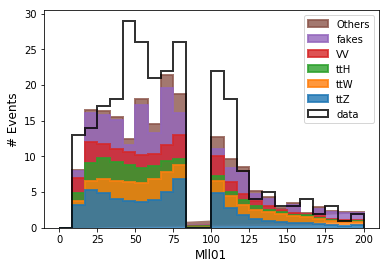

In [157]:
plot_stack_var(data_sel,bkg_set_sel,labels_list,'Mll01',0.001)

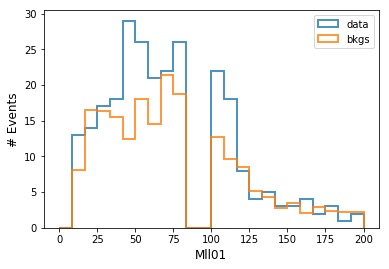

In [158]:
plt.hist(data_sel[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(bkg_set_sel[var]*0.001, binning[var], histtype='step',
         label=["bkgs"],
         weights=bkg_set_sel.t_w,
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()   

In [159]:
def split_by_Bjet(df):
    df_1b=df.loc[df.nJets_OR_MV2c10_70==1]
    df_2b=df.loc[df.nJets_OR_MV2c10_70>=2]    
    return df_1b,df_2b

In [160]:
def ovr_slot(df_d,df_b,var='Mll01',GeV=0.001,fig_size=(10, 5)):
    f, ax = plt.subplots(figsize=fig_size)
    ax.hist(df_d[var]*GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
    ax.hist(df_b[var]*GeV, binning[var], histtype='step',
         label=["bkgs"],
         weights=df_b.t_w,
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
    ax.set_xlabel(var,fontsize=12)
    ax.set_ylabel('# Events',fontsize=12)    
    ax.legend()   
    return ax


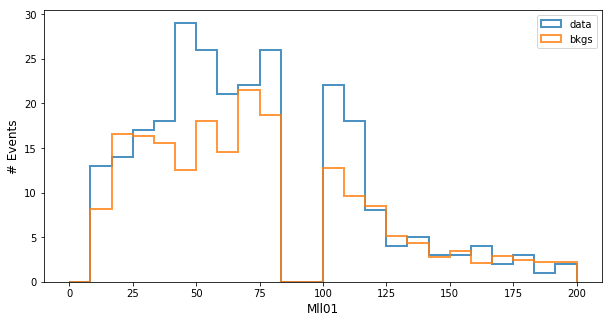

In [161]:
ovr_slot(data_sel,bkg_set_sel)

In [162]:
d_1, d_2 = split_by_Bjet(data_sel)

In [163]:
b_1, b_2 = split_by_Bjet(bkg_set_sel)

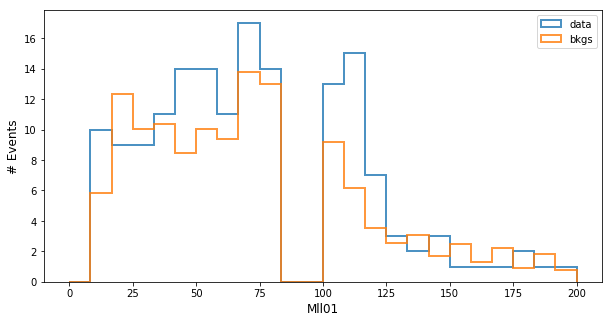

In [164]:
ovr_slot(d_1,b_1)

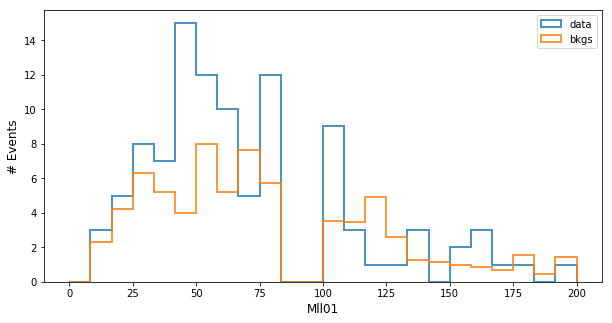

In [165]:
ovr_slot(d_2,b_2)

In [166]:
feature = bkg_set.columns
feature.size

1219

In [167]:
feature[0]
#.str.find('UP')

'entry'

In [168]:
features

['entry',
 'is1L2Tau',
 'is2L2Tau',
 'is2LSS0Tau',
 'pass_tight_2L',
 'pass_SS_2L',
 'is2LSS1Tau',
 'is2LOS1Tau',
 'is3L',
 'is3L1Tau',
 'is4L',
 'is2lLowNJet0Tau',
 'is2LSS0Tau_SR_Relaxed',
 'is2LSS1Tau_SR_Relaxed',
 'is3L0Tau_SR_Relaxed',
 'is3L0Tau_SR_Relaxed3j',
 'is4L_SR_VV_Relaxed',
 'is4L_SR_ttV_Relaxed',
 'is4L_SR_ttV_Zenriched',
 'is3L0Tau_CR_ttbar_Relaxed',
 'is3L0Tau_CR_VV_Relaxed',
 'is3L0Tau_CR_ttW_Relaxed',
 'is2L_VR_ttW_ICHEP',
 'is2L_VR_ttbarFakes_ICHEP',
 'is4lCRttZRelaxed',
 'is2LOS1Tau_CR_ttbar',
 'is2LOS1Tau_CR_ttZ',
 'is2LOS1Tau_CR_W',
 'is3L1Tau_VR',
 'is2lOS0TauBaseline',
 'is2lOS0TauBaseline_ee',
 'is2lOS0TauBaseline_mm',
 'is2lOS0TauBaseline_OF',
 'is2lOS0TauBaseline_me',
 'is2lOS0TauBaseline_em',
 'is2lSS0TauBaseline',
 'is2lSS0TauBaseline_ee',
 'is2lSS0TauBaseline_mm',
 'is2lSS0TauBaseline_OF',
 'is2lSS0TauBaseline_me',
 'is2lSS0TauBaseline_em',
 'is2lOS1TauBaseline',
 'is2lOS1TauBaseline_ee',
 'is2lOS1TauBaseline_mm',
 'is2lOS1TauBaseline_OF',
 'is2lOS1TauBa

In [331]:
def list_branch_to_remove(df,additional_vars=[]):
    syst_list=['UP','DOWN','CRB','scale','weight','SF','Eff',
               'forFit','HLT','tau','MV2c20','is1','is2','is3','is4',
               'ghost','flvWtOrdr','pass']
    syst_list=syst_list+additional_vars
    matches_syst=[]
    features = list(df.columns.values)
    for x in features:
        for j in syst_list:
            if j in x:
                matches_syst.append(x.strip())
    return matches_syst


In [170]:
data_sel_trim = data_sel.drop(list_branch_to_remove(data_sel),axis=1)

In [171]:
bkg_set_sel_trim = bkg_set_sel.drop(list_branch_to_remove(bkg_set_sel),axis=1)

In [188]:
data_sel_trim1.columns

Index(['entry', 'isGNv02', 'minOSMll', 'DEtall01', 'DEtall02', 'DEtall12',
       'lep_flavour', 'jet_flavor', 'total_charge_2lSS', 'isExtConv',
       ...
       'lead_jetEta', 'lead_jetPhi', 'lead_jetE', 'sublead_jetPt',
       'sublead_jetEta', 'sublead_jetPhi', 'sublead_jetE', 'label', 't_w',
       'ltype'],
      dtype='object', length=651)

In [187]:
bkg_set_sel_trim.columns

Index(['entry', 'isGNv02', 'minOSMll', 'DEtall01', 'DEtall02', 'DEtall12',
       'lep_flavour', 'jet_flavor', 'total_charge_2lSS', 'isExtConv',
       ...
       'lead_jetEta', 'lead_jetPhi', 'lead_jetE', 'sublead_jetPt',
       'sublead_jetEta', 'sublead_jetPhi', 'sublead_jetE', 'label', 't_w',
       'ltype'],
      dtype='object', length=652)

In [189]:
s = set(data_sel_trim1.columns)
temp3 = [x for x in bkg_set_sel_trim.columns if x not in s]
temp3

['nJets']

In [205]:
bkg_set_sel_trim1 = bkg_set_sel_trim.drop(['nJets'],axis=1)

In [184]:
data_sel_trim1 = data_sel_trim.drop(temp3,axis=1)

In [433]:
Xnew=pandas.concat([data_sel_trim1,bkg_set_sel_trim1])

In [228]:
y=X['ltype']

In [252]:
#X=X.drop(['ltype'],axis=1)
X=X.drop(['t_w'],axis=1)

In [237]:
X=X.drop(['label'],axis=1)

In [302]:
final_clean=[]
for i in X.columns:
    val = X[i].sum()
    if val< -1e+30 or val> 1e+30:
        print(i,val)
        final_clean.append(i)

In [413]:
for i in X.columns:
    val = X[i].sum()
    if abs(val)>1e+30:
        print(i,val)
        final_clean.append(i)

In [414]:
final_clean

[]

In [301]:
X = X.drop(final_clean,axis=1)

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler



In [260]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [437]:
X0=list_branch_to_remove(Xnew,['pileupEventWeight_090','UP','DOWN','CRB','scale','weight',
                                 'SF','Eff','forFit','HLT','tau','MV2c20','is1','is2','is3',
                                 'is4','ghost','flvWtOrdr','pass','mc_channel_number','truth',
                                 'isBrems','isTruth','isQMisID','isExtConv','isConv',
                                 'isIntConv','isISR','ist','isFake','isLepFromPhEvent',
                                'isPrompt','top_','isW','MEphoton','jet_flavor',
                                'pileupEventWeight_090','JVT_EventWeight','SherpaNJetWeight','mcWeightOrg','mcEventWeights',
                                'isPrompt','isV','higgs','Clas','bcid','lbn','EventNumber','entry','RunNumber'])
#,'isBrems','isTruth','isQMisID','isExtConv','isConv','isIntConv','isISR''isttGamma']

In [434]:
Xnew=Xnew.drop(['label'],axis=1)

In [438]:
Xnew= Xnew.drop(X0,axis=1)
#['lep_truthType_0'].head()# 

In [396]:
X_noTr=X_noTr.drop(['RunNumber'],axis=1)

In [440]:
len(Xnew.columns)

488

In [428]:
col_mask=X.isnull().any(axis=0)
row_mask=X.isnull().any(axis=1)
X.loc[row_mask,col_mask]

""


In [493]:
Xnew2= Xnew2.drop(['mlb_h','MV2c10_60_EventWeight','MV2c10_70_EventWeight','MV2c10_77_EventWeight','MV2c10_85_EventWeight','MV2c10_Continuous_EventWeight','averageMW'],axis=1)
#'mlb_h','MV2c10_60_EventWeight','MV2c10_70_EventWeight','MV2c10_77_EventWeight','MV2c10_85_EventWeight','MV2c10_Continuous_EventWeight','averageMW'

In [457]:
Xnew2.isnull().values.any()

False

In [455]:
for i in Xnew.columns:
    if Xnew[i].isnull().any():
        print(i)

mlb_h


In [458]:
nan_rows = Xnew2[Xnew2.isnull().any(1)]
nan_rows

,isGNv02,minOSMll,DEtall01,DEtall02,DEtall12,lep_flavour,total_charge_2lSS,max_eta,SDRll,DeltaR_max_lep,...,lead_jetPt,lead_jetEta,lead_jetPhi,lead_jetE,sublead_jetPt,sublead_jetEta,sublead_jetPhi,sublead_jetE,t_w,ltype


In [451]:
Xnew.isnull().any()

isGNv02                    False
minOSMll                   False
DEtall01                   False
DEtall02                   False
DEtall12                   False
lep_flavour                False
total_charge_2lSS          False
max_eta                    False
SDRll                      False
DeltaR_max_lep             False
DPhi_max_lep_met           False
DeltaR_min_lep_jet         False
minDeltaR_LJ_0             False
minDeltaR_LJ_1             False
minDeltaR_LJ_2             False
Meff                       False
Mjj_closeW                 False
DRlb_h                     False
ptlb_h                     False
DeltaRLeadjets             False
jet1pTbin                  False
jet2pTbin                  False
jet3pTbin                  False
jet3etabin                 False
jet1MV2c10_bin             False
jet2MV2c10_bin             False
MvisH                      False
MvisnonH                   False
lep_PtVarCone20Rel_1       False
DeltaRLeadLepClosestJet    False
          

In [448]:
Xnew.isnull().sum()

isGNv02                    0
minOSMll                   0
DEtall01                   0
DEtall02                   0
DEtall12                   0
lep_flavour                0
total_charge_2lSS          0
max_eta                    0
SDRll                      0
DeltaR_max_lep             0
DPhi_max_lep_met           0
DeltaR_min_lep_jet         0
minDeltaR_LJ_0             0
minDeltaR_LJ_1             0
minDeltaR_LJ_2             0
Meff                       0
Mjj_closeW                 0
DRlb_h                     0
ptlb_h                     0
DeltaRLeadjets             0
jet1pTbin                  0
jet2pTbin                  0
jet3pTbin                  0
jet3etabin                 0
jet1MV2c10_bin             0
jet2MV2c10_bin             0
MvisH                      0
MvisnonH                   0
lep_PtVarCone20Rel_1       0
DeltaRLeadLepClosestJet    0
                          ..
matchDLTll13               0
matchDLTll23               0
best_Z_Mll                 0
best_Z_other_M

In [494]:
len(Xnew2.columns)

480

In [495]:
c_n2= clf.fit(Xnew2, y)

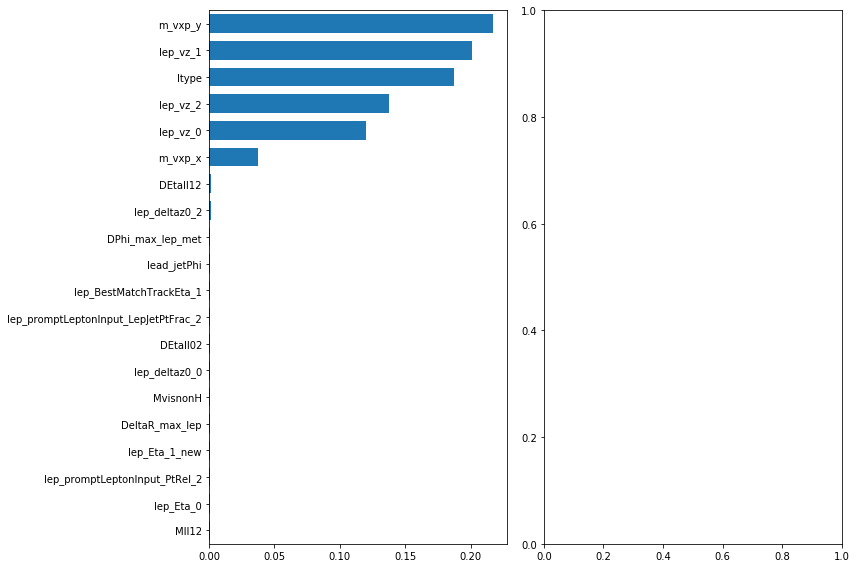

In [496]:
tree_importance_sorted_idx = np.argsort(model_n2.feature_importances_)
tree_indices = np.arange(0, len(model_n2.feature_importances_)) + 0.5
#tree_indices = np.arange(0, 20)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         model_n2.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(Xnew2.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((len(clf.feature_importances_)-20,len(clf.feature_importances_)))
fig.tight_layout()
plt.show()

In [459]:
tree_indices

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

In [482]:

tree_importance_sorted_idx[]

array([  0, 118, 119, 120, 121, 351, 350, 126, 325, 324, 130, 323, 322,
       321, 320, 137, 319, 318, 117, 362, 371, 109, 396, 395, 393,  93,
        94,  96,  97,  98, 317,  99, 227, 102, 103, 104, 105, 106, 107,
       108, 100, 316, 315, 314, 168, 291, 290, 289, 288, 287, 286, 278,
       292, 271, 269, 268, 248, 238, 236, 232, 231, 198, 270, 397, 293,
       295, 313, 312, 311, 310, 309, 308, 307, 306, 294, 305, 303, 302,
       301, 300, 299, 298, 297, 296, 304,  86, 101, 398,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  85,  42,  43,  44,  45,
        46,  47,  48, 419,  49, 421, 428, 466,   5,   6, 454, 452, 451,
       450, 446, 445, 444, 443, 442, 441, 440, 436, 435, 434, 433, 429,
       423,  50,  41,  52, 414, 413, 412, 411, 410, 409, 408,  51, 406,
       405,  76, 404, 403, 402, 401, 400, 399, 415, 416, 407, 208,  54,
        53,  56,  57,  58,  59,  60,  55, 418,  61, 417, 327, 230, 459,
       378, 233, 189, 394, 190, 369, 188, 240, 353, 275, 228, 13

In [478]:
j=0
for i in clf.feature_importances_:
    j+=1
    if i >0.01:
        print(j,i)

123 0.044618419080834464
124 0.2901410119340837
185 0.1905874618122115
225 0.16683657846090216
265 0.183979681465354


In [466]:
X_noTr.columns

Index(['isGNv02', 'minOSMll', 'DEtall01', 'DEtall02', 'DEtall12',
       'lep_flavour', 'total_charge_2lSS', 'max_eta', 'SDRll',
       'DeltaR_max_lep',
       ...
       'HT_lep', 'HT_jets', 'lead_jetPt', 'lead_jetEta', 'lead_jetPhi',
       'lead_jetE', 'sublead_jetPt', 'sublead_jetEta', 'sublead_jetPhi',
       'sublead_jetE'],
      dtype='object', length=479)

In [473]:
clf.feature_importances_[:10]

array([0.        , 0.0009335 , 0.00057016, 0.0007321 , 0.00130519,
       0.        , 0.        , 0.00044458, 0.00124421, 0.00057138])

In [476]:
tree_importance_sorted_idx_short[:10]

array([  0, 430, 431, 432, 433, 434, 435, 436, 437, 438])